In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/titanic.zip

Archive:  drive/MyDrive/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import e
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification

df = pd.read_csv('train.csv')

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
encoder = LabelEncoder()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = encoder.fit_transform(df['Embarked'])
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.head())

(712, 7) (179, 7) (712,) (179,)
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
331       1    0  45.5      0      0  28.5000         2
733       2    0  23.0      0      0  13.0000         2
382       3    0  32.0      0      0   7.9250         2
704       3    0  26.0      1      0   7.8542         2
813       3    1   6.0      4      2  31.2750         2


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Create the SVM model
model = SVC(kernel='linear',max_iter=1000)
clf = model.fit(x_train_scaled, y_train)

#Accuracy of the model
accuracy = model.score(x_test_scaled, y_test)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.7821229050279329


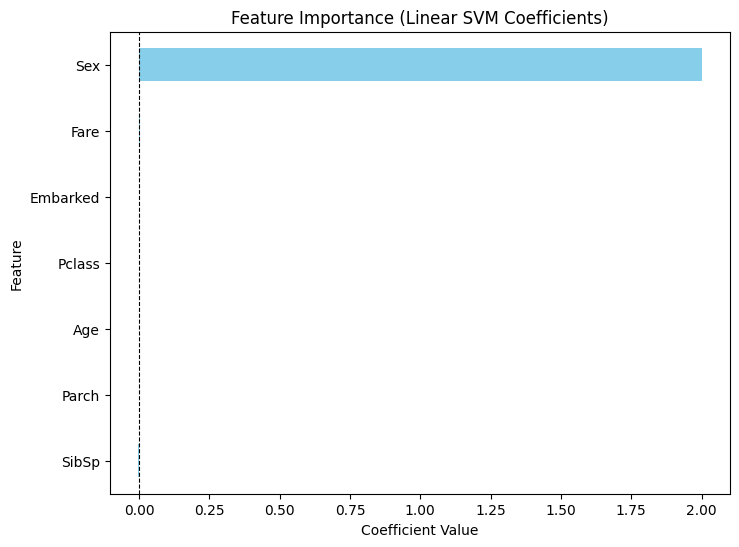

In [ ]:
feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
coefficients = pd.Series(model.coef_[0], index=feature_names)
# Plotting
plt.figure(figsize=(8, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


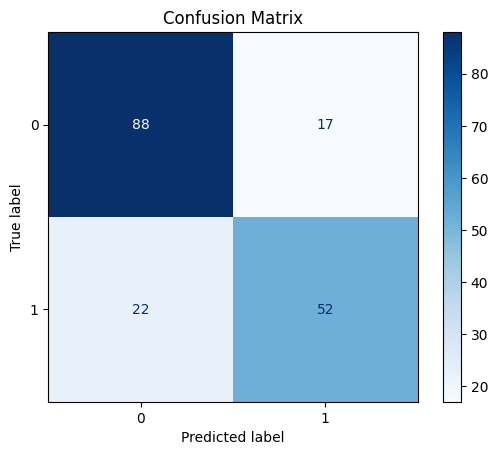

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Survived    1.000000
Sex         0.543351
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.167675
Pclass     -0.338481
Name: Survived, dtype: float64


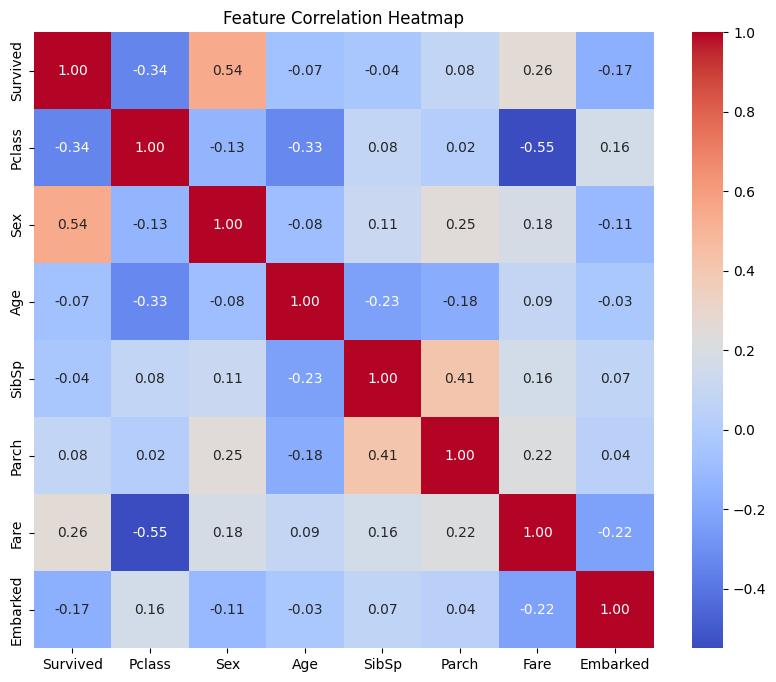

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display correlation with 'Survived'
correlation_with_survived = correlation_matrix['Survived'].sort_values(ascending=False)
print(correlation_with_survived)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

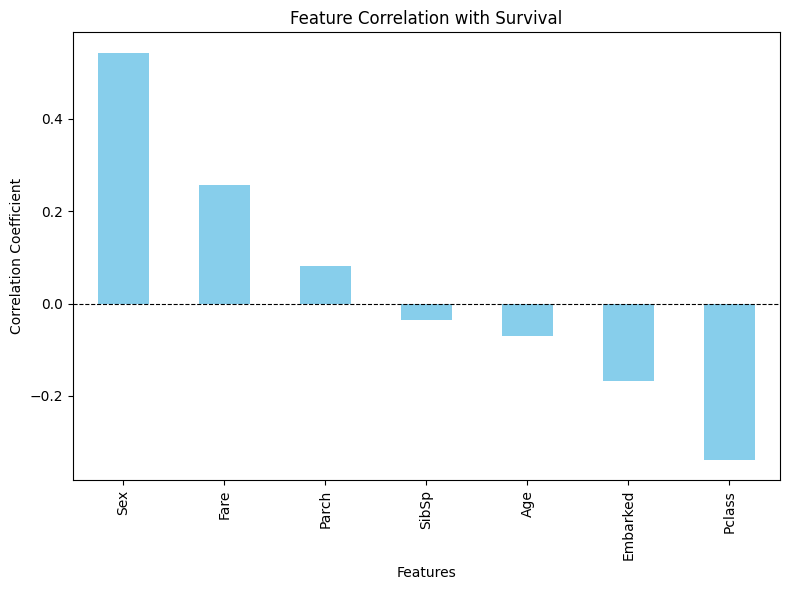

In [ ]:
# Plot correlation with Survived
correlation_with_survived.drop('Survived').plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Feature Correlation with Survival')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = x_train[['Sex', 'Age']]
X_scaled = StandardScaler().fit_transform(X)
y = y_train
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel='linear')
clf = model.fit(X, y)
print("3 feature Model: ",model.score(x_test[['Sex', 'Age']],y_test))

3 feature Model:  0.7821229050279329


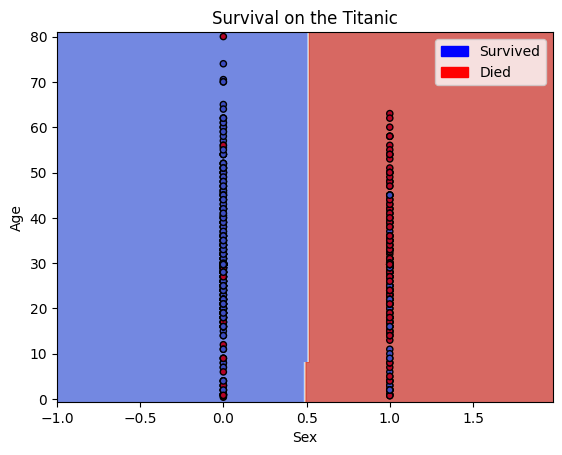

The person survived
Accuracy: 0.7821229050279329
Precision: 0.7536231884057971
Recall: 0.7027027027027027
F1 Score: 0.7272727272727273
Survived Male: 87
Died Male: 380
Survived Female: 181
Died Female: 64


In [ ]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(pd.DataFrame({'Sex': xx.ravel(), 'Age': yy.ravel()}))
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

survived_patch = Patch(color='blue', label='Survived')
died_patch = Patch(color='red', label='Died')

fig, ax = plt.subplots()


X0, X1 = X['Sex'], X['Age']
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)


ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_ylabel('Age')
ax.set_xlabel('Sex')
ax.set_title("Survival on the Titanic")
ax.legend(handles=[survived_patch, died_patch])

plt.show()

# Prediction if Kristian will survive the titanic
# 0: Male, 1: Female
input_data = pd.DataFrame([[1, 68]], columns=['Sex', 'Age'])

# Make prediction
prediction = clf.predict(input_data)

# Check prediction result
if prediction[0] == 1:
    print("The person survived")
else:
    print("The person died")


# Predict on the test set
y_pred = clf.predict(x_test[['Sex', 'Age']])


# Evaluate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

data = X.copy()
data['Survived'] = y  # Add the target column to the DataFrame for easier filtering

# Count the occurrences
survived_male = data[(data['Sex'] == 0) & (data['Survived'] == 1)].shape[0]
died_male = data[(data['Sex'] == 0) & (data['Survived'] == 0)].shape[0]
survived_female = data[(data['Sex'] == 1) & (data['Survived'] == 1)].shape[0]
died_female = data[(data['Sex'] == 1) & (data['Survived'] == 0)].shape[0]

# Print the results
print(f"Survived Male: {survived_male}")
print(f"Died Male: {died_male}")
print(f"Survived Female: {survived_female}")
print(f"Died Female: {died_female}")